In [1]:
# Super Store Analysis
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
furniture = pd.read_csv("C:\\Users\\user\\Desktop\\DATA ANALYST\\Python\\Super Store.csv")

In [3]:
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [4]:
# Checking structure of the data
furniture.shape

(2121, 21)

In [5]:
furniture.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [6]:
# Checking Data Types and Missing Values
# Summaryof the Data
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [7]:
# Checking the furniture sales time stamp
furniture['Order Date'].min(), furniture['Order Date'].max()

('1/1/2017', '9/9/2017')

In [8]:
# We remove the columns that we do not need as well as check missing values
furniture = furniture[['Order Date', 'Sales']]

furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [9]:
# Aggregate sales data by date
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
# groupby Returns a groupby object that contains information about the groups

In [10]:
furniture

,Order Date,Sales
0,1/1/2017,975.4900
1,1/10/2014,51.9400
2,1/10/2015,1018.1040
3,1/10/2016,104.7700
4,1/11/2014,9.9400
...,...,...
884,9/8/2016,3374.9816
885,9/8/2017,1000.2390
886,9/9/2014,864.0240
887,9/9/2016,15.0080


In [11]:
# Indexing with the Time Series Data
furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])
furniture.set_index('Order Date', inplace=True)
furniture.index

DatetimeIndex(['2017-01-01', '2014-01-10', '2015-01-10', '2016-01-10',
               '2014-01-11', '2016-01-11', '2017-01-12', '2014-01-13',
               '2015-01-13', '2017-01-13',
               ...
               '2014-09-07', '2015-09-07', '2017-09-07', '2014-09-08',
               '2015-09-08', '2016-09-08', '2017-09-08', '2014-09-09',
               '2016-09-09', '2017-09-09'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [12]:
furniture.head()

,Sales
Order Date,
2017-01-01,975.490
2014-01-10,51.940
2015-01-10,1018.104
2016-01-10,104.770
2014-01-11,9.940


In [13]:
y = furniture['Sales'].resample('MS').mean()   # first date start MS & last date M.

In [14]:
# Taking a look at the furniture sales data for the year 2014
y['2014':]

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

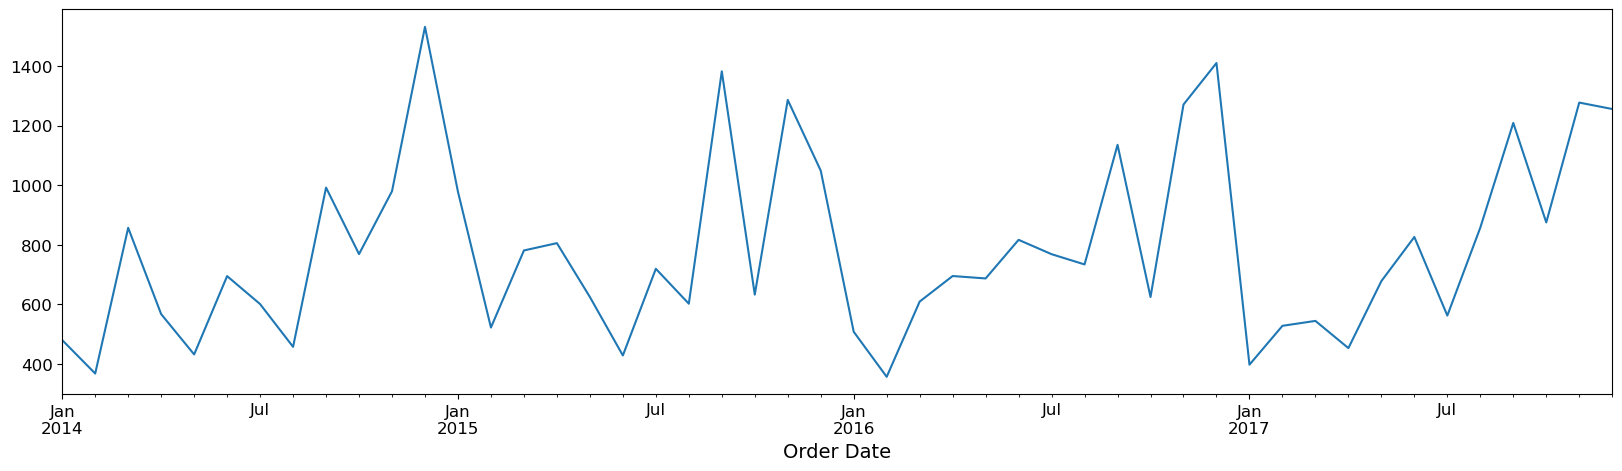

In [15]:
# Visualizing Furniture Sales Time Series Data
y.plot(figsize=(20, 5))
plt.show()

In [16]:
# Checking Stationarity

from pandas import Series
from statsmodels.tsa.stattools import adfuller
# Augmented Dickey-Fuller (ADF) Statitics
result = adfuller(furniture)

In [17]:
# Checking Stationarity

from pandas import Series
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Lag used :%f'% result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.191070
p-value: 0.000009
Lag used :10.000000
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610


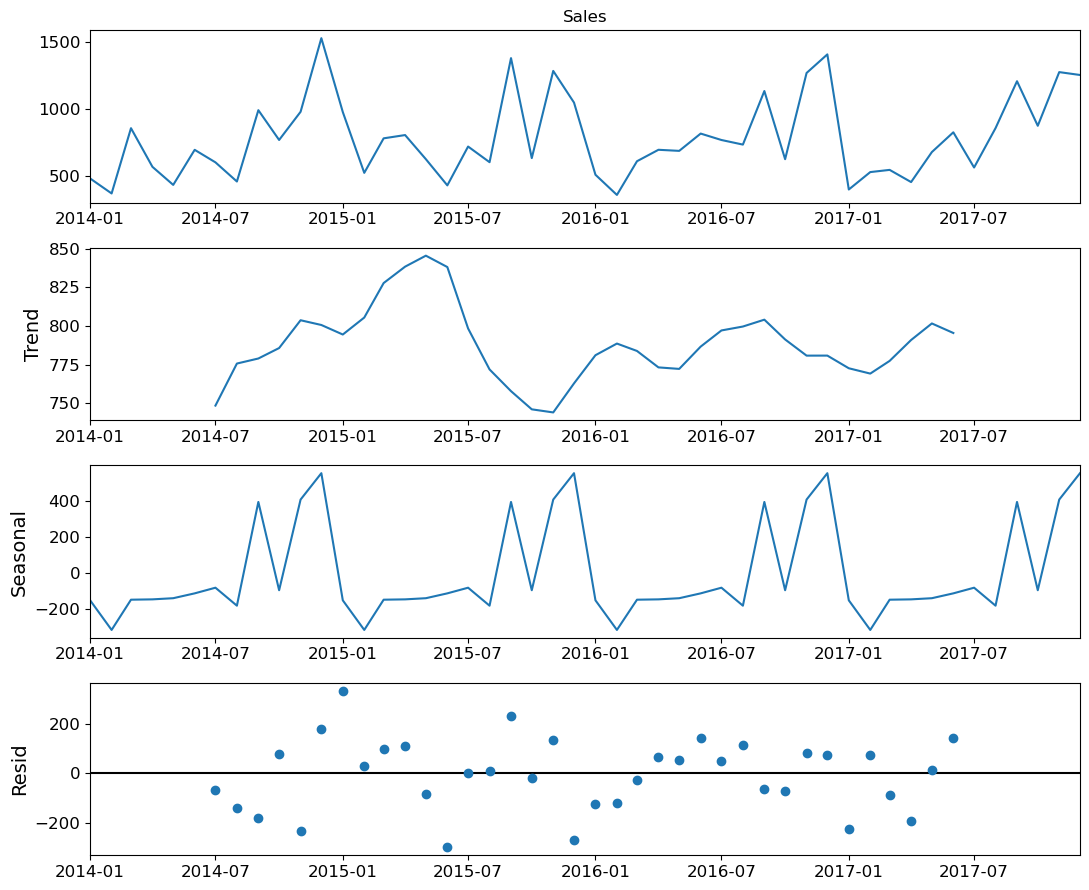

In [18]:
# Decomposing

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(y)
fig = decomposition.plot()
plt.show()

In [19]:
# Forecasting Time Series Forecasting using ARIMA

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for  ARIMA...')

print(pdq)
print('Examples of parameter combinations for Seasonal ARIMA...')
print(seasonal_pdq)

Examples of parameter combinations for  ARIMA...
[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
Examples of parameter combinations for Seasonal ARIMA...
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [20]:
# Parameter Selection

from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,seasonal_order=param_seasonal,
enforce_stationarity=False, #Whether or not to transform the AR parameters to enforce stationarity in the autoregressive component of the model. Default is True
enforce_invertibility=False) #Whether or not to transform the MA parameters to enforce invertibility in the moving average component of the model. Default is True
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1477.9768099386033
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.71701309212006
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.27028997936577
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418338
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1454.9978036138832
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.00471991163414


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.24882803017533
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758111
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2681.7662368166525
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.5607429809157


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.62613896732927


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.5949195694807
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2432.4931929562586
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946867
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.8725576435655
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.8947668414504
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1515.45485298623


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.6378567269463
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:304.96712281679623
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1344.0094232892525
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:306.91132001514353
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176816861
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2042.2136786697718


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.87055484828755
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.5806233417245
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.1832977442735


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1862.214472732893
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.7574368417319
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.55766214612305
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067712


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1033.5062402071765
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.4632147852136
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:304.2077675160926
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.92593679351876


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1469.7336866944897
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.46646750846094
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:304.58426921438155
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7794442185925
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2632.3054039827152
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.3685195815932


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:293.342219396594
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.57633238771894


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2424.897293869108
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.01560021204244
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:293.75131881272017
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1447.6333389614056
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.2003422281134
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:300.21306116191045
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.3403658784486
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1233.3739211038524
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.62709013453934
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:302.32649925063794
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019834962


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2519.574360015581
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.47626876112304
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:281.3873006939396
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.5250354660688


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1862.2908659730801
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.78754395439273
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:283.3661014395642


In [21]:
# Fitting the ARIMA model

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0953      0.310     -0.307      0.759      -0.703       0.513
ma.L1         -1.0000      0.414     -2.417      0.016      -1.811      -0.189
ma.S.L12      -0.3049      0.172     -1.777      0.076      -0.641       0.031
sigma2      2.476e+04   1.67e-05   1.48e+09      0.000    2.48e+04    2.48e+04


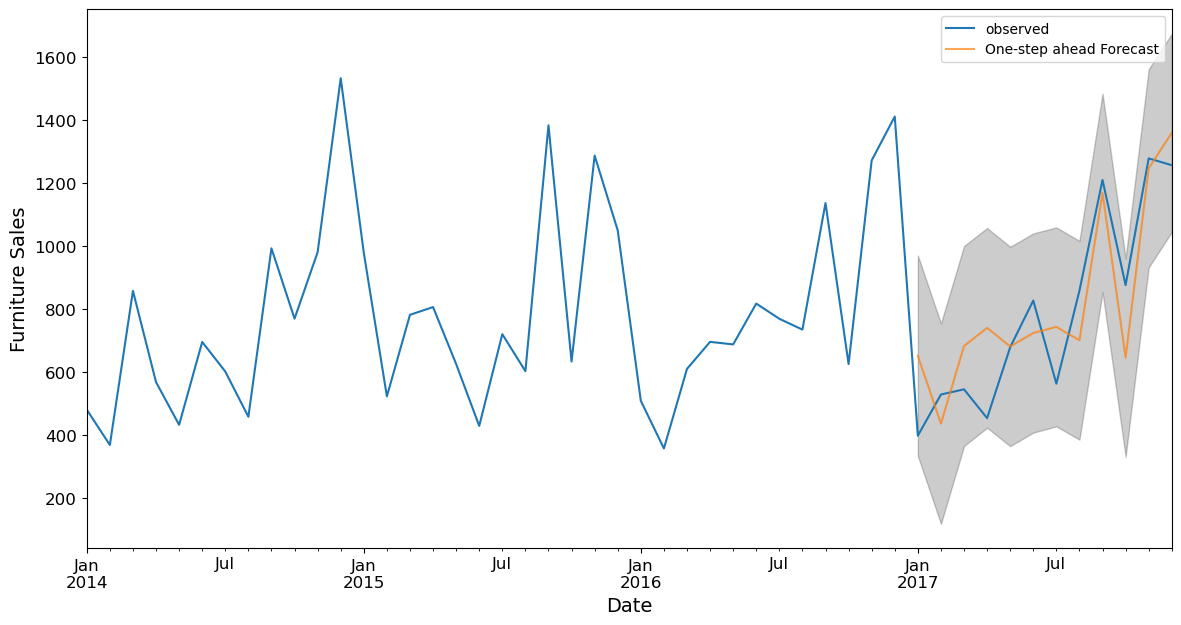

In [22]:
#set forecasts to start at 2017–01–01 to the end of the data to forecast
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [23]:
# Calculating RMSE

y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 160.2


            lower Sales  upper Sales
2018-01-01   180.810810   809.230361
2018-02-01   185.884539   815.331461
2018-03-01   282.556818   912.166807
2018-04-01   231.330632   860.927480
2018-05-01   370.586109  1000.184230
2018-06-01   494.815376  1124.413376
2018-07-01   318.005244   947.603255
2018-08-01   504.639229  1134.237240
2018-09-01   899.942975  1529.540985
2018-10-01   503.578798  1133.176808
2018-11-01   969.608524  1599.206535
2018-12-01   982.550250  1612.148167
2019-01-01   113.519847   891.836130


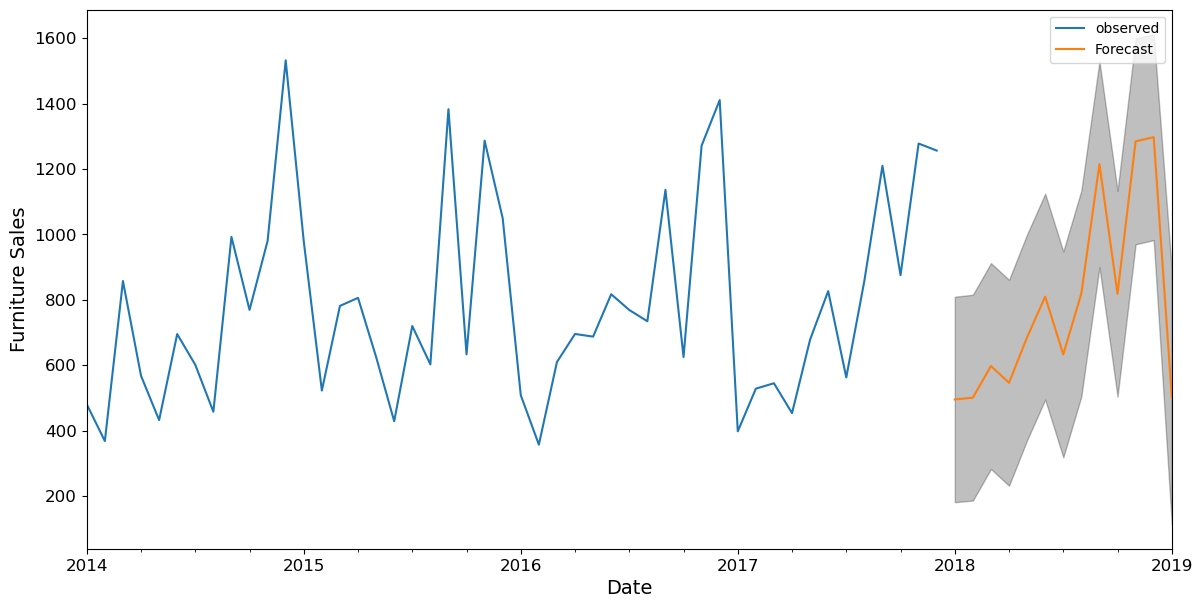

In [24]:
# Visualizing the Forecast

pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
print(pred_ci)
plt.legend()
plt.show()

In [25]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1600x800 with 0 Axes>